## **A. Business Understanding**##
 
##Company Background##
Autumn bank is a Malaysian universal bank based in Kuala Lumpur, Malaysia. This bank was founded in 1988 by Ong T’nsam (20WMR08883), Lai Pei Xuan (20WMR08869) and Leong Yit Wee (20WMR08876). Autumn bank is the largest public listed company in Bursa Malaysia, the Malaysian Stock Exchange in 1990. Autumn bank issued the ATM and debit card for accessing the balance of savings account in 1992 so that it is more convenient for their customers to withdraw money and check account balance. Indirectly, customer satisfaction will be increased and customer loyalty and retention will be improved. Autumn bank provides financial products and services to the public namely personal banking, commercial banking, investment banking, management of unit trust funds, general insurance products and so on. 
 
##Objectives##
Due to the increasing competitiveness, Autumn bank has adopted a system to analyse the customer churn, predict the customer churn rate and the group of customers that are churn. So, by having this system, Autumn bank’s management is able to carry out the strategic plan to retain the existing customers based on the customer churn analytics. In addition, customer loyalty and retention will be improved as the management is able to develop customer retention strategies such as improve customer service, offer a discount or credit to return based on the results from churn analytics.
 
##Current Situation##
###Inventory of Resources###
Students from Bachelor of Computer Science (Honours) in Data Science which include Ong T’nsam (20WMR08883), Lai Pei Xuan (20WMR08869) and Leong Yit Wee (20WMR08876) are helping Autumn Bank to perform the churn analytics in order to identify the customers who are going to churn so that the management is able to plan some strategies to retain the customers. The source of the dataset used is from Kaggle (https://www.kaggle.com/kmalit/bank-customer-churn-prediction). The software used in developing this system is Google Colab.
 
###Requirements and constraints###
This project is required to be accomplished by 11:59 pm of 13th September 2020. The dataset used is accessible by the public as the owner shared this dataset in the Kaggle website, thus there is no any legal issues when this dataset is being used to develop the churn analytics project.
 
##Data mining goals##
###Business success criteria###
When this churn analytics project is implemented successfully, the business objectives of Autumn Bank will be achieved successfully. This is because the purpose of this project is to help the Autumn bank to predict the customers who are going to churn so that the management is able to take action to reduce the customer churn rate and retain the existing customers.
 
###Data mining success criteria###
The data mining success criteria depends on the accuracy, precision, recall and F1 score. If the accuracy, precision, recall and F1 score is high, then the data mining is considered as success. This is because with high accuracy, precision, recall and F1 score, the results generated from churn analytics will be more accurate. 
 
##Project Plan##
The dataset will be splitted into train set and test set. Also, the null values will be removed from the datasets if there are any null values. Not only that, the columns ‘Geography’ and ‘Gender’ will be transformed to numeric data as it is easier to perform churn analytics by using numeric data as compared to categorical data. In additon, due to the imbalance of the dataset, Synthetic Minority Over-sampling Technique (SMOTE) is being used to handle the imbalance data before modelling so that results generated will be more accurate. The evaluation for modelling used is based on the accuracy, precision, recall and F1 score, the model with high accuracy, precision, recall and F1 score will be deployed for the churn analytics system.
 
###Initial assessment of tools and techniques###
Scikit-learn is used for the modelling part as scikit-learn is a machine learning library which features various algorithms which are required for the churn analytics system implementation. The tool used for this project is Google Colab as it does not have a limit for the memory space and it will save everything in Google Drive, so users do not need to worry about the problem of lack of memory space on their laptop. Also, Google Colab includes a user-friendly interface which is easier for the users to learn, use and understand in order to do the coding.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AGugkwda2WV-2AnudcsmNCxKBVu4FIS8GxHyXdiOZr5X7U9r7Y2oQc
Mounted at /content/drive


##Import Libraries and Data Preparation##

In [ ]:
## Required libraries
#For data wrangling
import pandas as pd
import numpy as np

#Read the dataFrame
bank = pd.read_csv('drive/My Drive/Colab Notebooks/bank_churn.csv')

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split

#Standardise data value
from sklearn.preprocessing import StandardScaler, LabelEncoder

#imbalance data
from imblearn.over_sampling import SMOTE

#remove warning message
import warnings
warnings.filterwarnings("ignore")

#Scoring functions
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## **B. Data Understanding**##
The churn analytics system adopted by Autumn bank load the datasets which contains the customers' information in order to analyse the customers information and predict the customer churn rate. The details about the datasets are shown in below.

In [ ]:
#Review the top rows of what os left of the dataframe
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#check data types of columns
dataTypeSeries = bank.dtypes
dataTypeSeries

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#How much data is contained in this dataset?
datasetSize = bank.shape
datasetSize
#In this dataset it contain 10000 rows and 14 columns

(10000, 14)

In [ ]:
#Checking the dataset have missing values or not
nullValue = bank.isnull().any()
nullValue

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

### Data Description

In this dataset it contain 10000 rows and 14 columns

***Float Type***

"Balance", "EstimatedSalary"

***Object Type***

"Surname", "Geography", "Gender" 

***Integer Type***

"RowNumber", "CustomerId", "CreditScore", "Age", "Tenure", "Numofproducts",   "HasCrCard", "IsActiveMember", "Exited"

***Categorical Values***

Nominal Values : "RowNumber", "CustomerId", "Surname", "Geography", "Gender"

Ordinal Values : "Age", "HasCrCard", "IsActiveMember", "Exited"

***Numerical Values***

Interval Values : "CreditScore"

Ratio Values : "Tenure", "Numofproducts", "Balance", "EstimatedSalary"

***Missing Values***

In this dataset do not contains any missing values.

***X variables***

All of this columns are X variables : 

"CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "Numofproducts", "HasCrCard", "IsActiveMember", "EstimatedSalary" 

***Y variables***

"Exited" is Y variable because it is the key to success or failed for the system.




###Data Visualization / Exploratory Data Analysis(EDA)###

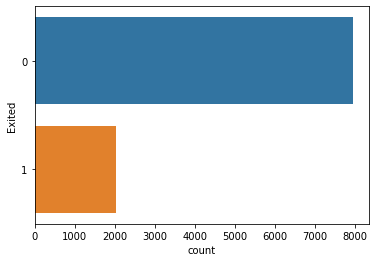

In [ ]:
#display the chart 
sns.countplot(y="Exited", data=bank)
plt.show()

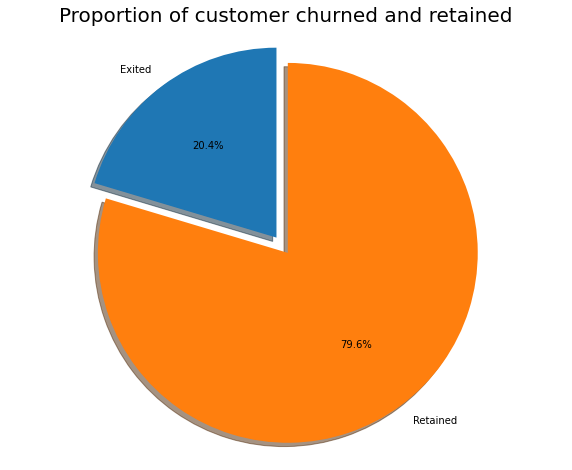

In [ ]:
#No of exited vs Active  get the percentage split figure
labels = 'Exited', 'Retained'
sizes = [bank.Exited[bank['Exited']==1].count(), bank.Exited[bank['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

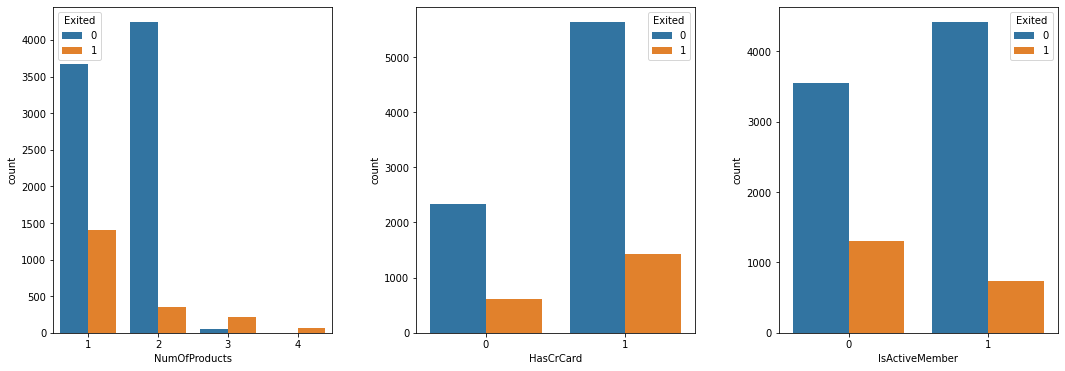

In [ ]:
# We first review the 'Status' relation with categorical variables
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = bank, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = bank, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = bank, ax = ax[2])

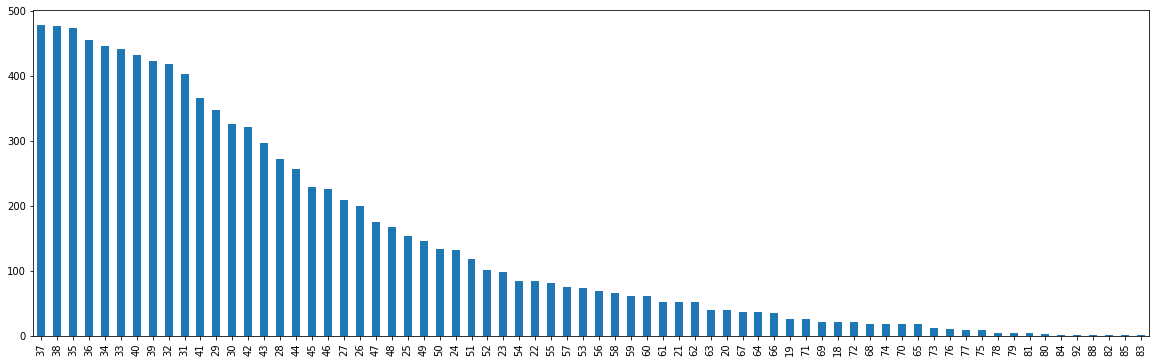

In [ ]:
bank["Age"].value_counts().plot.bar(figsize=(20,6))

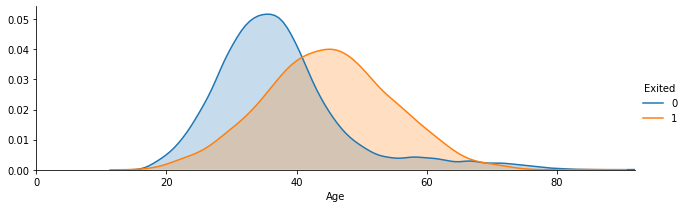

In [ ]:
facet = sns.FacetGrid(bank, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, bank["Age"].max()))
facet.add_legend()

plt.show()

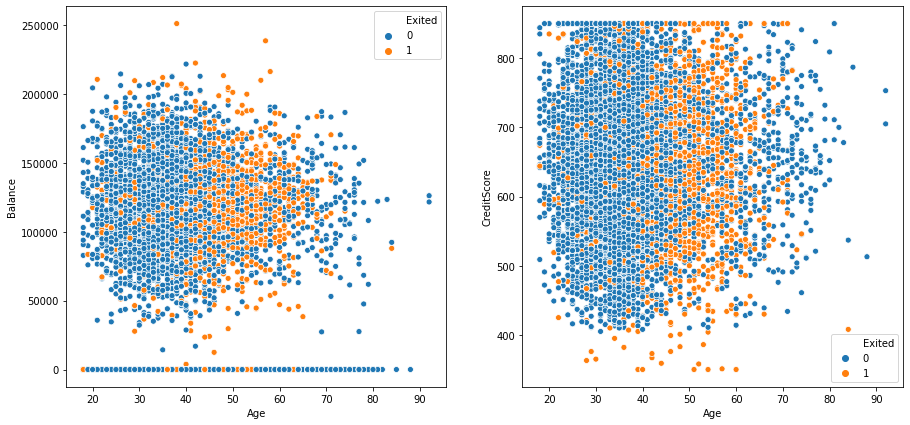

In [ ]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = bank, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = bank, ax=ax[1])

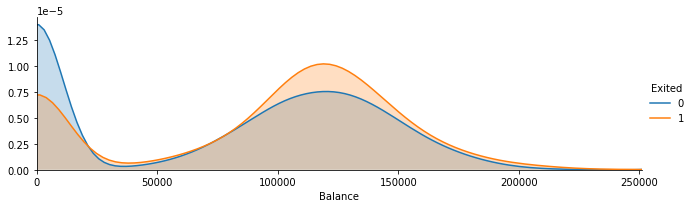

In [ ]:
facet = sns.FacetGrid(bank, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, bank["Balance"].max()))
facet.add_legend()

plt.show()

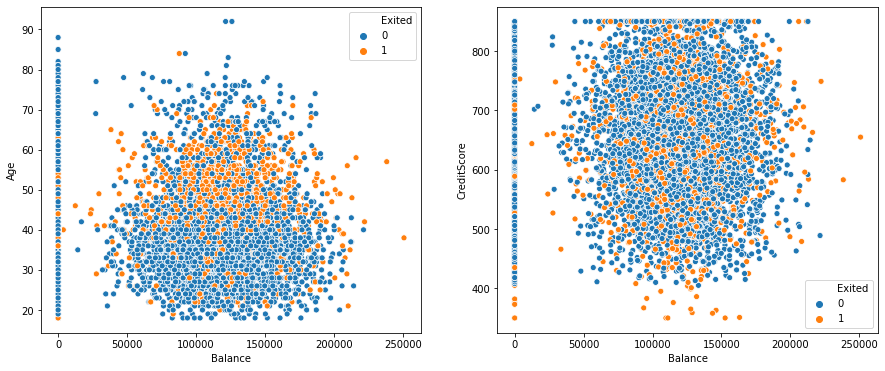

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = bank, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = bank, hue="Exited", ax = ax[1])

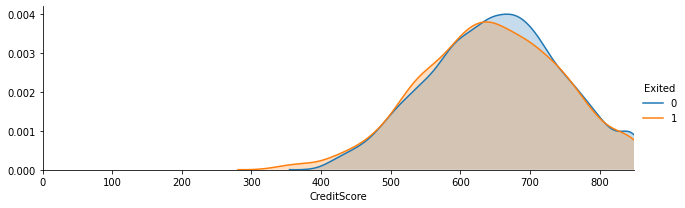

In [ ]:
facet = sns.FacetGrid(bank, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, bank["CreditScore"].max()))
facet.add_legend()

plt.show()

### Checking Correlation

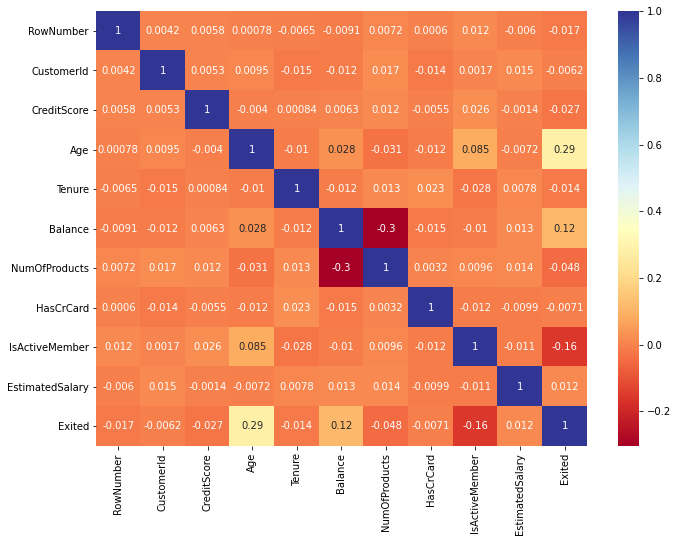

In [ ]:
plt.subplots(figsize=(11,8))
sns.heatmap(bank.corr(), annot=True, cmap="RdYlBu")
plt.show()

## **C. Data Preparation**##
Autumn Company is doing the predicting churn for bank customers and the dataset we will use for this case contains details of a bank’s customers. The target variable “Exited” is a binary variable which reflects whether the customer closed his/her account and left the bank or not. The reason we choose this dataset because it contains the information of the customers and customers’ demographics data is important data for helping the company to predict the customers who want to continue to be the customers of the bank or left the bank. 

### Data Cleaning###
There are many variables contained in the dataset but some variables are unnecessary or unneeded for predicting the churn analysis. In order to avoid getting erroneous that will affect the results outcome, the data cleaning is being carried out because it is an important process before doing prediction churn analysis. From the dataset we selected, the columns which are unnecessary for the churn analytics namely ‘RowNumber’, ‘CustomerId’ and ‘Surname’ are being removed.

In [ ]:
bank = bank.drop(['RowNumber','Surname','CustomerId'], axis=1)

bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###Transform Categorical to Numeric###
Next, there are many machine learning algorithms that can support the categorical values without further manipulation but still have some algorithms that do not accept the categorical data. From the dataset, we can see that most of the columns data are present in numeric only except the ‘Geography’ and ‘Gender’ which are present in categorial features. Thus, we apply the pandas and scikit-learn to transform the categorical data which are ‘Geography’ and ‘Gender’ into suitable numeric values. Below are the codes and output after transforming.

In [ ]:
encoder = LabelEncoder()
bank["Geography"] = encoder.fit_transform(bank["Geography"])
bank["Gender"] = encoder.fit_transform(bank["Gender"])

bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


###Data Preprocessing###

### Handle Missing Value
In the data understanding stage, below shows that there are no missing values in the dataset. Due to no missing values included inside, we no longer need to handle the missing values and replace it.

###Check missing value###


In [ ]:
#check missing value
nullValue = bank.isnull().any()
nullValue

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
# Drops missing values for all columns
bank = bank.dropna(how='any')

### Handle Outlier###
We are checking all the attributes in the dataset that have any outlier contained. After we cheked, we found that 'CreditScore', 'Age', 'NumofProducts' and 'Exited' are containing outlier. Thus, we decided it which are a valid outlier or invalid outlier. In a result, we find that they are the valid outlier, so remain it.

###Checking Outlier###

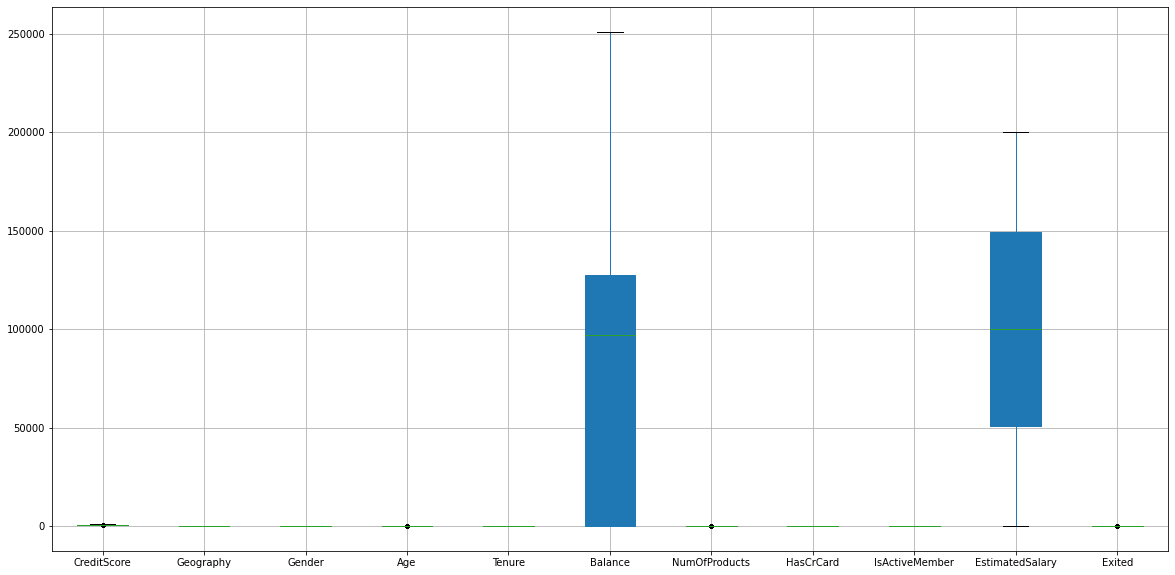

In [ ]:
plt.subplots(figsize = (20,10))
bank.boxplot(patch_artist= True, sym="k.")

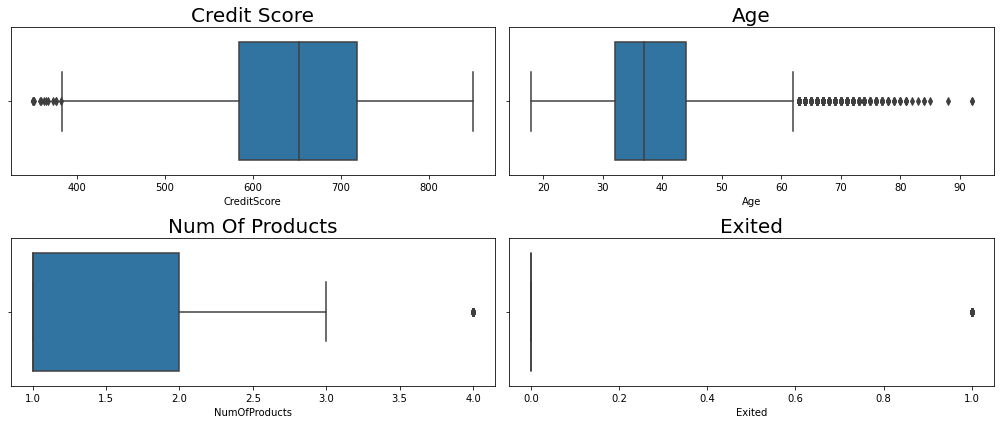

In [ ]:
#format the figure size to 20rows,10cols
plt.subplots(figsize = (14,6))

#plot graph by Credit Score
plt.subplot(221)
sns.boxplot(x = bank["CreditScore"])
plt.title("Credit Score", fontsize = 20)

#plot graph by Age
plt.subplot(222)
sns.boxplot(x = bank["Age"])
plt.title("Age", fontsize = 20)

#plot graph by NumOfProducts
plt.subplot(223)
sns.boxplot(x = bank["NumOfProducts"])
plt.title("Num Of Products", fontsize = 20)

#plot graph by Exited
plt.subplot(224)
sns.boxplot(x = bank["Exited"])
plt.title("Exited", fontsize = 20)

plt.tight_layout()
plt.show()

In [ ]:
#count the rows with "Y" and "N" in the Exited
bank['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
#highly unbalanced dataset,
#lets describe data 
bank.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


###Split Train & Test###

In [ ]:
C = bank.drop("Exited", axis=1)

In [ ]:
X = np.array(bank.iloc[:, bank.columns != 'Exited'])
y = np.array(bank.iloc[:, bank.columns == 'Exited'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)

X_train:  (8000, 10)
y_train:  (8000, 1)


In [ ]:
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_test:  (2000, 10)
y_test:  (2000, 1)


###SMOTE###
As our dataset is imbalance, so we need to use SMOTE to handle the imbalance dataset before modelling it.

###Use SMOTE to balance the number of occurence of a label###

In [ ]:
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Shape of X: (10000, 10)
Shape of y: (10000, 1)
Number transactions X_train dataset:  (8000, 10)
Number transactions y_train dataset:  (8000, 1)
Number transactions X_test dataset:  (2000, 10)
Number transactions y_test dataset:  (2000, 1)


In [ ]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

#confirm the data has been balanced
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': [1632]
Before OverSampling, counts of label '0': [6368] 

After OverSampling, the shape of train_X: (12736, 10)
After OverSampling, the shape of train_y: (12736,) 

After OverSampling, counts of label '1': 6368
After OverSampling, counts of label '0': 6368


## **D. Modelling**##

###Algorithm Selected###
There are 9 algorithms applied to perform modelling on the dataset in order to find the best modelling technique to help Autumn Bank to solve the problem of customer churn. 

###1)K-nearest Neighbors (KNN)###
KNN is a distance-based classifier and it can be used for both classification and regression predictive problems. KNN is an algorithm that can be used to classify an unseen similar object based on the bunch of object that have been classified. In order to classify an object, k neighbourhood need to be defined so that the object can be classified to the class most common among its k nearest neighbors. The k is a positive integer and typically small. In KNN regression, the output is the property value for the object. The value is the average of the values of k nearest neighbors and it is accurate. Therefore, by using KNN algorithm, Autumn Bank is able to predict whether the customer will churn or not by classifying them by a plurality vote of its neighbors.

###2)Logistic Regression###
Logistic regression is a statistical model that in its basic form uses a logistic function to solve the binary classification problem. Logistic regression can be used for various classification problems such as will the customers churn or not. Logistic regression is able to generate results which is not complicated in a short time and it is easy to implement. Furthermore, logistic regresiion describes and estimated the relationship between one dependent binary variable and independent variables. 

###3)Random Forest###
Random forest is a supervised learning algorithm which can be used for both classification and regression. It is an algorithm which is easy to implement and it can handle both missing values and outliers automatically. It creates decision tress on randomly selected data samples and generate prediction from each tree. So, by using the random forest algorithm, customer churn can be predicted and identified based on the results generated from the trees.

###4)SVM(Support Vector Machine)###

Support vector machine (SVM) is a supervised machine learning algorithm it can be used for classification or regression challenges. But mainly used for classification problems. In this algorithm, we plot each data item as a point in n-dimensional space, where n is the number of features you have, and the value of each feature is the value of a specific coordinate. Then, we classify by finding the hyperplane that distinguishes the two categories or we call it as classes.

###5)Gaussian Naive Bayes###


In statistics, the naive Bayes classifier is a series of simple "probabilistic classifiers", which are based on Bayes' theorem and have strong (naive) independence assumptions between features. They are one of the simplest Bayesian network models. But they can be used in conjunction with kernel density estimation and achieve a higher level of accuracy. The naive Bayesian classifier has a high degree of scalability. In the learning problem, the number of parameters is linearly related to the number of variables (features/predictors). Maximum likelihood training can be done by evaluating a closed-form expression that requires linear time, rather than through expensive iterative approximations like many other types of classifiers.

###6)Decision Tree###

Decision tree is a kind of decision support tool, which uses tree decision model and its possible consequences, including accidental event results, resource cost and utility. This is a way to display an algorithm that contains only conditional control statements. Decision trees are often used in operational research, especially in decision analysis, to help determine the most likely strategy to achieve a goal, but it is also a popular tool in machine learning.

###7)XGBoost Classifier###
XGBoost as known as "Extreme Gradient Boosting". It is a decision-tree-based ensemble machine learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data such as image and text, artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured or tabular data, decision tree based algorithms are considered best-in-class right now.

###8)LightGBM Classifier###
LightGBM is a gradient boosting framework that uses tree based machine learning algorithms. It is designed to be distributed and efficient with the following advantages like faster training speed and higher efficiency, lower memory usage, better accuracy, support of parallel and GPU learning, and capable of handling large-scale data.

###9)Artificial Neural Network (ANN)###
An artificial neural network (ANN) is a kind of machine learning algorithms. It is the piece of a computing system designed to simulate the way the human brain analyzes and processes information. It is the foundation of artificial intelligence (AI) and solves problems that would prove impossible or difficult by human or statiscal standards. ANNs have self-learning capabilities that enable them to produce better results as more data becomes available.

###KNN###

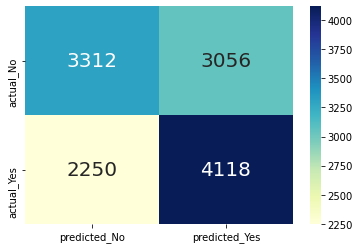

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
%matplotlib inline

#K-Nearest Neighbour algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 299)

#train using the algorithm
knn.fit(X_train, y_train)

#trainset
pred_knn_train = knn.predict(X_train)

#display confusion matrix for trainset
KNN_cm_train=confusion_matrix(y_train,pred_knn_train)
sns.heatmap(KNN_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = KNN_cm_train[0]
true_pos, false_neg = KNN_cm_train[1]

            Trainset             Testset
Accuracy:   0.5833856783919598 	 0.5325
Recall:     0.6466708542713567 	 0.6518518518518519
Precision:  0.5740172846389741 	 0.2495274102079395
F1 score:   0.6081819524442476 	 0.3609022556390977


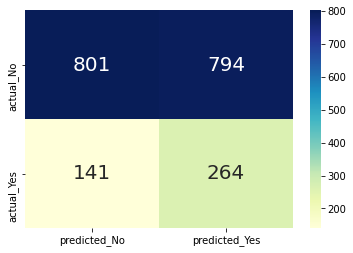

In [ ]:
#use trainset to do prediction on testset
pred_knn = knn.predict(X_test)

#display confusion matrix for testset
KNN_cm=confusion_matrix(y_test,pred_knn)
sns.heatmap(KNN_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = KNN_cm[0]
true_pos, false_neg = KNN_cm[1]

#print the accuracy score, recall, precision and F1 score 
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_knn_train),"\t",accuracy_score(y_test,pred_knn))
print("Recall:    ",recall_score(y_train,pred_knn_train),"\t",recall_score(y_test,pred_knn))
print("Precision: ",precision_score(y_train,pred_knn_train),"\t",precision_score(y_test,pred_knn))
print("F1 score:  ",f1_score(y_train,pred_knn_train),"\t",f1_score(y_test,pred_knn))

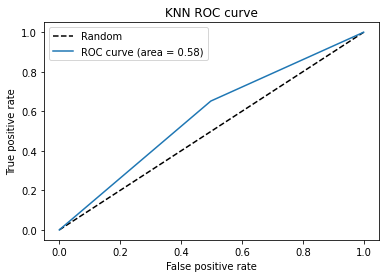

In [ ]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_knn)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNN ROC curve')
plt.legend(loc ='best')

###Logistic Regression###

['No' 'Yes' 'No' ... 'Yes' 'Yes' 'Yes']


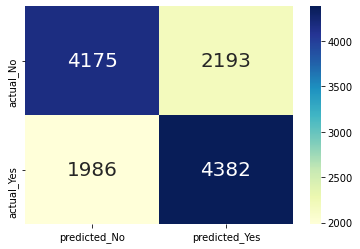

In [ ]:
## Logistic Regression

#import the library
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

lr = LogisticRegression()

#Train the mdoel
lr.fit(X_train, y_train)

pred_lr_train = lr.predict(X_train)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_lr_train]))

#display confusion matrix for trainset
lr_cm_train = confusion_matrix(y_train,pred_lr_train)
sns.heatmap(lr_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = lr_cm_train[0]
true_pos, false_neg = lr_cm_train[1] 

['No' 'Yes' 'No' ... 'Yes' 'No' 'No']
            Trainset             Testset
Accuracy:   0.671875 		 0.6685
Recall:     0.6881281407035176 	 0.7209876543209877
Precision:  0.6664638783269962 	 0.34679334916864607
F1 score:   0.6771227690643591 	 0.46832397754611066


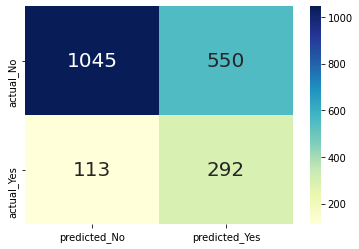

In [ ]:
#Take the model that was trained on the X_train data and apply it to the X_test
pred_lr = lr.predict(X_test)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_lr]))

#display confusion matrix for testset 
lr_cm = confusion_matrix(y_test,pred_lr)
sns.heatmap(lr_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = lr_cm[0]
true_pos, false_neg = lr_cm[1] 

#print the accuracy score, recall, precision and F1 score 
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_lr_train),"\t\t",accuracy_score(y_test,pred_lr))
print("Recall:    ",recall_score(y_train,pred_lr_train),"\t",recall_score(y_test,pred_lr))
print("Precision: ",precision_score(y_train,pred_lr_train),"\t",precision_score(y_test,pred_lr))
print("F1 score:  ",f1_score(y_train,pred_lr_train),"\t",f1_score(y_test,pred_lr))

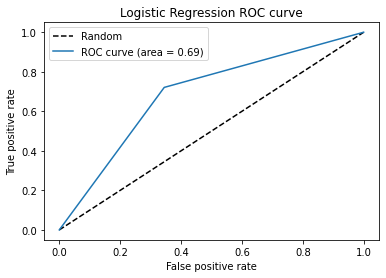

In [ ]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_lr)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc ='best')

###Random Forest###

In [ ]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100)

# Train the model on training data
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']


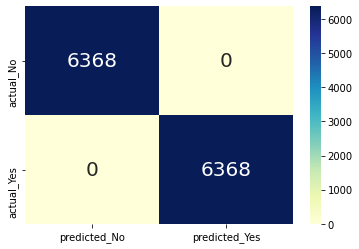

In [ ]:
#Take the model that was trained on the X_train data and apply it to the X_test
pred_rf_train = rf.predict(X_train)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_rf_train]))

#display confusion matrix for trainset
rf_cm_train = confusion_matrix(y_train,pred_rf_train)
sns.heatmap(rf_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = rf_cm_train[0]
true_pos, false_neg = rf_cm_train[1] 

['No' 'No' 'No' ... 'No' 'No' 'No']
            Trainset     Testset
Accuracy:   1.0 	 0.858
Recall:     1.0 	 0.5432098765432098
Precision:  1.0 	 0.6896551724137931
F1 score:   1.0 	 0.6077348066298343


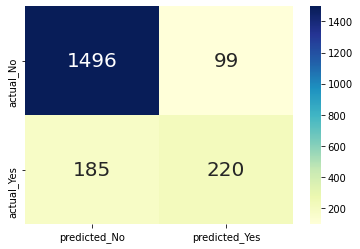

In [ ]:
#Take the model that was trained on the X_train data and apply it to the X_test
pred_rf = rf.predict(X_test)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_rf]))

#display confusion matrix 
rf_cm = confusion_matrix(y_test,pred_rf)
sns.heatmap(rf_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = rf_cm[0]
true_pos, false_neg = rf_cm[1] 

#print the accuracy score, recall, precision and F1 score 
print("            Trainset     Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_rf_train),"\t",accuracy_score(y_test,pred_rf))
print("Recall:    ",recall_score(y_train,pred_rf_train),"\t",recall_score(y_test,pred_rf))
print("Precision: ",precision_score(y_train,pred_rf_train),"\t",precision_score(y_test,pred_rf))
print("F1 score:  ",f1_score(y_train,pred_rf_train),"\t",f1_score(y_test,pred_rf))

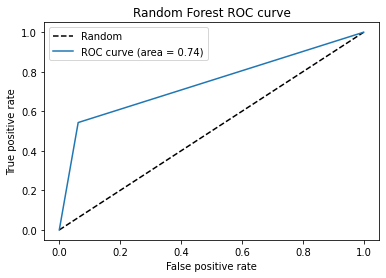

In [ ]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_rf)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc ='best')

####Feature importance####

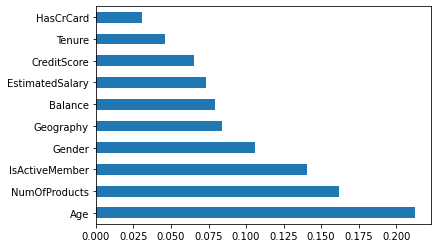

In [ ]:
rf_feat_importances = pd.Series(rf.feature_importances_, index=C.columns)
rf_feat_importances.nlargest(10).plot(kind='barh')

### SVM(Support Vector Machine)###


['No' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']


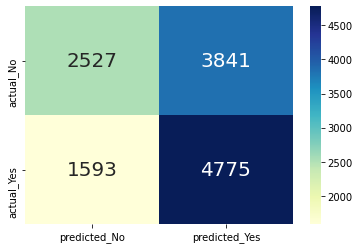

In [ ]:
from sklearn.svm import SVC
svc = SVC()
#train using the algorithm
svc.fit(X_train,y_train)
pred_svc_train = svc.predict(X_train)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_svc_train]))

#display confusion matrix for trainset
svc_cm_train = confusion_matrix(y_train,pred_svc_train)
sns.heatmap(svc_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = svc_cm_train[0]
true_pos, false_neg = svc_cm_train[1]
      

['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
            Trainset             Testset
Accuracy:   0.5733354271356784 	 0.4535
Recall:     0.7498429648241206 	 0.7654320987654321
Precision:  0.5542014856081708 	 0.23700305810397554
F1 score:   0.6373465029364656 	 0.36193812025685934


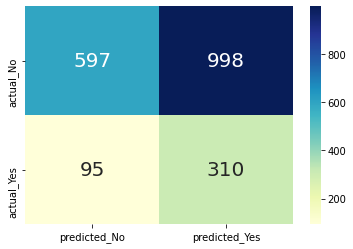

In [ ]:
#use trainset to do prediction on testset
pred_svc = svc.predict(X_test)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_svc]))

#display confusion matrix for testset
svc_cm=confusion_matrix(y_test,pred_svc)
sns.heatmap(svc_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = svc_cm[0]
true_pos, false_neg = svc_cm[1]

#print the accuracy score, recall, precision and F1 score 
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_svc_train),"\t",accuracy_score(y_test,pred_svc))
print("Recall:    ",recall_score(y_train,pred_svc_train),"\t",recall_score(y_test,pred_svc))
print("Precision: ",precision_score(y_train,pred_svc_train),"\t",precision_score(y_test,pred_svc))
print("F1 score:  ",f1_score(y_train,pred_svc_train),"\t",f1_score(y_test,pred_svc))



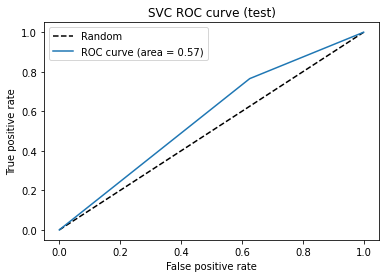

In [ ]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_svc)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVC ROC curve (test)')
plt.legend(loc ='best')

### Gaussian Naive Bayes###

['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']


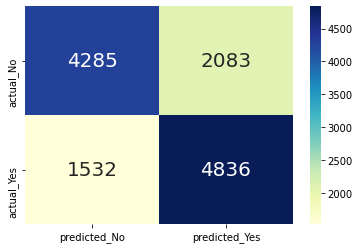

In [ ]:
#import GNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#train using the algorithm
gnb.fit(X_train,y_train)
pred_gnb_train = gnb.predict(X_train)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_gnb_train]))

#display confusion matrix for trainset
gnb_cm_train = confusion_matrix(y_train,pred_gnb_train)
sns.heatmap(gnb_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = gnb_cm_train[0]
true_pos, false_neg = gnb_cm_train[1]


['No' 'Yes' 'Yes' ... 'Yes' 'No' 'No']
            Trainset                    Testset
Accuracy:   0.7161589195979899 	 0.677
Recall:     0.7594221105527639 	 0.7333333333333333
Precision:  0.6989449342390519 	 0.35568862275449104
F1 score:   0.7279295552043351 	 0.4790322580645162


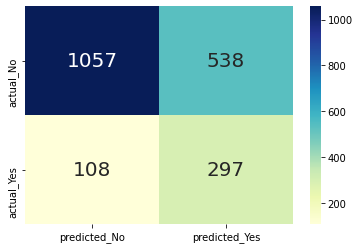

In [ ]:
#use trainset to do prediction on testset
pred_gnb = gnb.predict(X_test)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_gnb]))

#display confusion matrix for testset
gnb_cm=confusion_matrix(y_test,pred_gnb)
sns.heatmap(gnb_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = gnb_cm[0]
true_pos, false_neg = gnb_cm[1]

#print the accuracy score, recall, precision and F1 score 
print("            Trainset                    Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_gnb_train),"\t",accuracy_score(y_test,pred_gnb))
print("Recall:    ",recall_score(y_train,pred_gnb_train),"\t",recall_score(y_test,pred_gnb))
print("Precision: ",precision_score(y_train,pred_gnb_train),"\t",precision_score(y_test,pred_gnb))
print("F1 score:  ",f1_score(y_train,pred_gnb_train),"\t",f1_score(y_test,pred_gnb))

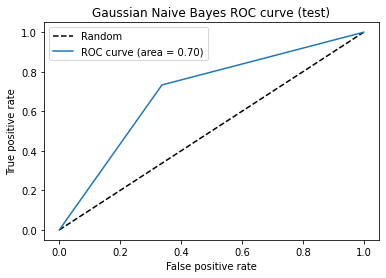

In [ ]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_gnb)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gaussian Naive Bayes ROC curve (test)')
plt.legend(loc ='best')

### Decision Tree###

['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']


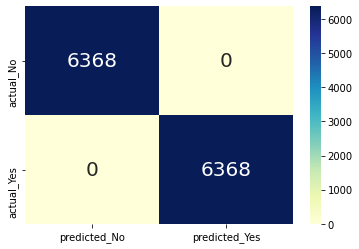

In [ ]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
#train using the algorithm
dt.fit(X_train,y_train)
pred_dt_train = dt.predict(X_train)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_dt_train]))

#display confusion matrix for trainset
dt_cm_train = confusion_matrix(y_train,pred_dt_train)
sns.heatmap(dt_cm_train,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = dt_cm_train[0]
true_pos, false_neg = dt_cm_train[1]

['Yes' 'No' 'Yes' ... 'No' 'No' 'Yes']
            Trainset             Testset
Accuracy:   1.0 	 0.7995
Recall:     1.0 	 0.5703703703703704
Precision:  1.0 	 0.5043668122270742
F1 score:   1.0 	 0.5353418308227116


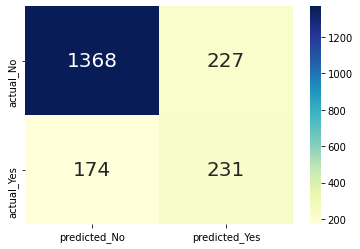

In [ ]:
#use trainset to do prediction on testset
pred_dt = dt.predict(X_test)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_dt]))

#display confusion matrix for testset
dt_cm=confusion_matrix(y_test,pred_dt)
sns.heatmap(dt_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = dt_cm[0]
true_pos, false_neg = dt_cm[1]

#print the accuracy score, recall, precision and F1 score 
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_dt_train),"\t",accuracy_score(y_test,pred_dt))
print("Recall:    ",recall_score(y_train,pred_dt_train),"\t",recall_score(y_test,pred_dt))
print("Precision: ",precision_score(y_train,pred_dt_train),"\t",precision_score(y_test,pred_dt))
print("F1 score:  ",f1_score(y_train,pred_dt_train),"\t",f1_score(y_test,pred_dt))

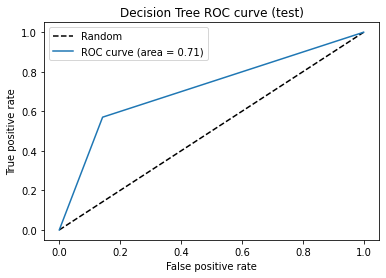

In [ ]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_dt)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree ROC curve (test)')
plt.legend(loc ='best')

[0.06771756 0.05379384 0.03342113 0.25829007 0.02477899 0.07886438
 0.24081078 0.00767344 0.14841428 0.08623553]


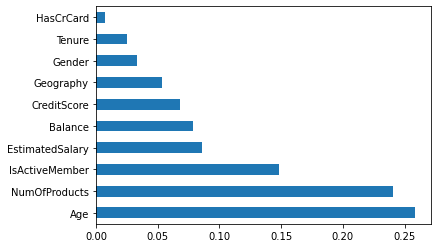

In [ ]:
# feature importance
print(dt.feature_importances_)
# plot
dt_feat_importances = pd.Series(dt.feature_importances_, index=C.columns)
dt_feat_importances.nlargest(10).plot(kind='barh')

###XGBoost Classifier###

['No' 'No' 'No' ... 'Yes' 'Yes' 'Yes']


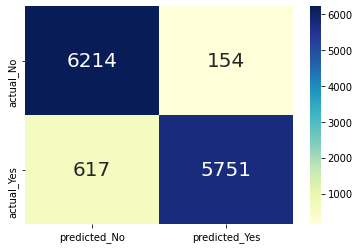

In [ ]:
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix

xgb = XGBClassifier(max_depth = 7,random_state=0, n_estimators=100, eval_metric = 'auc', min_child_weight = 1,
                    colsample_bylevel = 1, subsample= 1)
xgb.fit(X_train, y_train)

#Take the model that was trained on the X_train data and apply it to the X_test
pred_xgb = xgb.predict(X_test)
pred_xgb_train = xgb.predict(X_train)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_xgb_train]))

#display confusion matrix 
xgb_cm = confusion_matrix(y_train,pred_xgb_train)
sns.heatmap(xgb_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = xgb_cm[0]
true_pos, false_neg = xgb_cm[1]


['No' 'No' 'No' ... 'No' 'No' 'No']
            Trainset             Testset
Accuracy:   0.9394629396984925 	 0.8625
Recall:     0.903109296482412 	 0.5580246913580247
Precision:  0.9739204064352244 	 0.7018633540372671
F1 score:   0.9371791737961378 	 0.6217331499312242


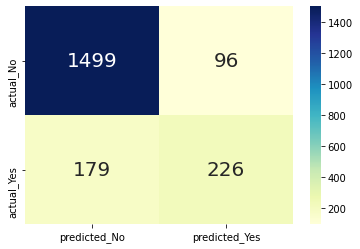

In [ ]:
options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_xgb]))

#display confusion matrix 
xgb_cm = confusion_matrix(y_test,pred_xgb)
sns.heatmap(xgb_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = xgb_cm[0]
true_pos, false_neg = xgb_cm[1]

#accuracy_xgb_test = accuracy_score(y_test,pred_xgb)
#recall_xgb_test = recall_score(y_test,pred_xgb)
#precision_xgb_test = precision_score(y_test,pred_xgb)
#f1score_xgb_test = f1_score(y_test,pred_xgb)

#print the accuracy score, recall, precision and F1 score 
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_xgb_train),"\t",accuracy_score(y_test,pred_xgb))
print("Recall:    ",recall_score(y_train,pred_xgb_train),"\t",recall_score(y_test,pred_xgb))
print("Precision: ",precision_score(y_train,pred_xgb_train),"\t",precision_score(y_test,pred_xgb))
print("F1 score:  ",f1_score(y_train,pred_xgb_train),"\t",f1_score(y_test,pred_xgb))

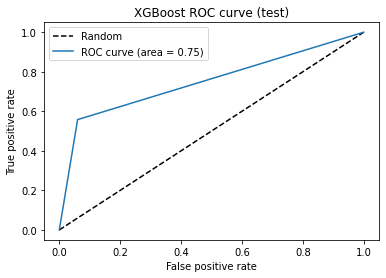

In [ ]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_xgb)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve (test)')
plt.legend(loc ='best')

#### Feature Importance

[0.01069242 0.06449925 0.2012967  0.12311573 0.01198879 0.01906214
 0.18866567 0.04547603 0.32341304 0.01179024]


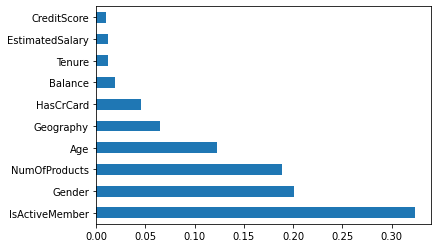

In [ ]:
# feature importance
print(xgb.feature_importances_)
# plot
xgb_feat_importances = pd.Series(xgb.feature_importances_, index=C.columns)
xgb_feat_importances.nlargest(10).plot(kind='barh')

###LightGBMClassifier

['No' 'No' 'No' ... 'No' 'No' 'No']


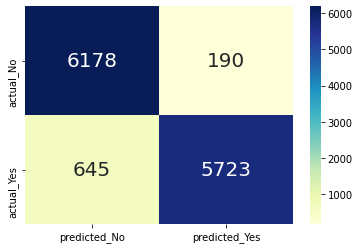

In [ ]:
from lightgbm import LGBMClassifier
from mlxtend.plotting import plot_confusion_matrix

lgbm_c = LGBMClassifier(max_depth = 7,random_state=None, n_estimators=100, eval_metric = 'auc', min_child_weight = 0.001,
                    colsample_bytree = 1.0, subsample= 1.0)
lgbm_c.fit(X_train, y_train)

#Take the model that was trained on the X_train data and apply it to the X_test
pred_lgbm_c = lgbm_c.predict(X_test)
pred_lgbm_c_train = lgbm_c.predict(X_train)

options = {0: "No", 1: "Yes"} 
print(np.array([options[x] for x in pred_lgbm_c]))

#display confusion matrix 
lgbm_c_cm = confusion_matrix(y_train,pred_lgbm_c_train)
sns.heatmap(lgbm_c_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = lgbm_c_cm[0]
true_pos, false_neg = lgbm_c_cm[1]

            Trainset             Testset
Accuracy:   0.9344378140703518 	 0.862
Recall:     0.898712311557789 	 0.5580246913580247
Precision:  0.9678674107897852 	 0.6996904024767802
F1 score:   0.932008794072144 	 0.6208791208791208


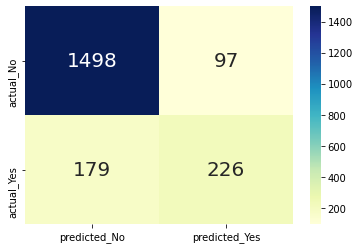

In [ ]:
#display confusion matrix 
lgbm_c_cm = confusion_matrix(y_test,pred_lgbm_c)
sns.heatmap(lgbm_c_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = lgbm_c_cm[0]
true_pos, false_neg = lgbm_c_cm[1]

#accuracy_lgbm_c_test = accuracy_score(y_test,pred_lgbm_c)
#recall_lgbm_c_test = recall_score(y_test,pred_lgbm_c)
#precision_lgbm_c_test = precision_score(y_test,pred_lgbm_c)
#f1score_lgbm_c_test = f1_score(y_test,pred_lgbm_c)

#print the accuracy score, recall, precision and F1 score 
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_lgbm_c_train),"\t",accuracy_score(y_test,pred_lgbm_c))
print("Recall:    ",recall_score(y_train,pred_lgbm_c_train),"\t",recall_score(y_test,pred_lgbm_c))
print("Precision: ",precision_score(y_train,pred_lgbm_c_train),"\t",precision_score(y_test,pred_lgbm_c))
print("F1 score:  ",f1_score(y_train,pred_lgbm_c_train),"\t",f1_score(y_test,pred_lgbm_c))

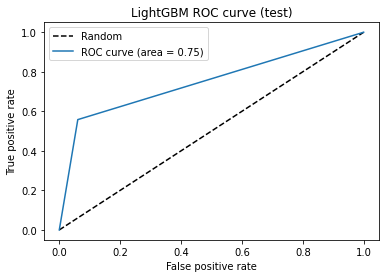

In [ ]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_lgbm_c)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LightGBM ROC curve (test)')
plt.legend(loc ='best')

####Feature Importance####

[387 279 138 428 207 478 397  79 135 382]


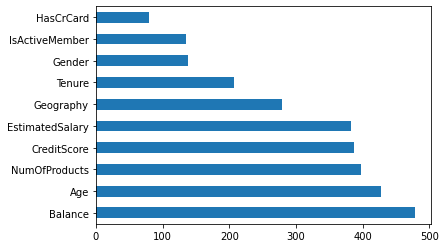

In [ ]:
# feature importance
print(lgbm_c.feature_importances_)
# plot
lgbm_feat_importances = pd.Series(lgbm_c.feature_importances_, index=C.columns)
lgbm_feat_importances.nlargest(10).plot(kind='barh')

###Artificial Neural Network (ANN)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

#create an object of sequential model
classifier = Sequential()
# Add the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [ ]:
#Compilling ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#fitting ANN
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1274/1274 [==============================] - 1s 968us/step - loss: 0.7287 - accuracy: 0.5451
Epoch 2/100
1274/1274 [==============================] - 1s 937us/step - loss: 0.6861 - accuracy: 0.5623
Epoch 3/100
1274/1274 [==============================] - 1s 941us/step - loss: 0.6856 - accuracy: 0.5658
Epoch 4/100
1274/1274 [==============================] - 1s 955us/step - loss: 0.6857 - accuracy: 0.5583
Epoch 5/100
1274/1274 [==============================] - 1s 949us/step - loss: 0.6860 - accuracy: 0.5625
Epoch 6/100
1274/1274 [==============================] - 1s 981us/step - loss: 0.6871 - accuracy: 0.5504
Epoch 7/100
1274/1274 [==============================] - 1s 955us/step - loss: 0.6869 - accuracy: 0.5509
Epoch 8/100
1274/1274 [==============================] - 1s 966us/step - loss: 0.6905 - accuracy: 0.5291
Epoch 9/100
1274/1274 [==============================] - 1s 960us/step - loss: 0.6928 - accuracy: 0.5052
Epoch 10/100
1274/1274 [==============================]

In [ ]:
##Prediction
#Take the model that was trained on the X_train data and apply it to the X_test
pred_ann = classifier.predict(X_test)
pred_ann_train = classifier.predict(X_train)

pred_ann = (pred_ann > 0.5)
pred_ann_train = (pred_ann_train >0.5)

encoder = LabelEncoder()
pred_ann = encoder.fit_transform(pred_ann)
pred_ann_train = encoder.fit_transform(pred_ann_train)

print(pred_ann)
print(pred_ann_train)

[1 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]


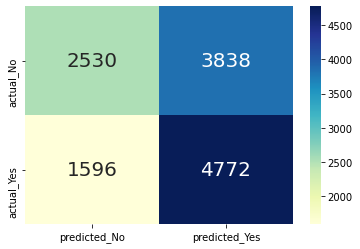

In [ ]:
#display confusion matrix 
ann_cm = confusion_matrix(y_train,pred_ann_train)
sns.heatmap(ann_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = ann_cm[0]
true_pos, false_neg = ann_cm[1]

            Trainset             Testset
Accuracy:   0.5733354271356784 	 0.4525
Recall:     0.7493718592964824 	 0.762962962962963
Precision:  0.5542392566782811 	 0.23623853211009174
F1 score:   0.6372012284684203 	 0.3607705779334501


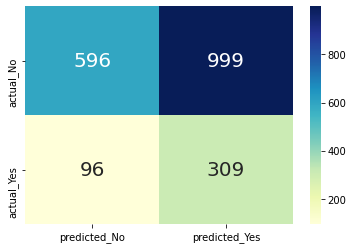

In [ ]:
#display confusion matrix 
ann_cm = confusion_matrix(y_test,pred_ann)
sns.heatmap(ann_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = ann_cm[0]
true_pos, false_neg = ann_cm[1]

#accuracy_ann_test = accuracy_score(y_test,pred_ann)
#recall_ann_test = recall_score(y_test,pred_ann)
#precision_ann_test = precision_score(y_test,pred_ann)
#f1score_ann_test = f1_score(y_test,pred_ann)

#print the accuracy score, recall, precision and F1 score 
print("            Trainset             Testset")
print("Accuracy:  ",accuracy_score(y_train,pred_ann_train),"\t",accuracy_score(y_test,pred_ann))
print("Recall:    ",recall_score(y_train,pred_ann_train),"\t",recall_score(y_test,pred_ann))
print("Precision: ",precision_score(y_train,pred_ann_train),"\t",precision_score(y_test,pred_ann))
print("F1 score:  ",f1_score(y_train,pred_ann_train),"\t",f1_score(y_test,pred_ann))

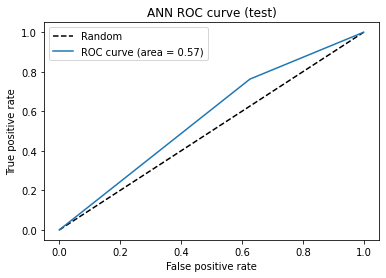

In [ ]:
from sklearn.metrics import roc_curve , auc

fpr, tpr, _ = roc_curve(y_test, pred_ann)
roc_auc = auc(fpr,tpr)

#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label = 'Random')
plt.plot(fpr,tpr,label ='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ANN ROC curve (test)')
plt.legend(loc ='best')

## **E. Evaluation**##

Churn prediction is important for Autumn Bank to predict the customer churn rate so that the management is able to develop customer retention strategies to retain the loyal customers. For the Autumn Bank's customers churn analytics, it is important to get a low false positive rates. This is because if the false positive rate is high, it means that the system predicts that the customer is churn but indeed the customer is not churn. As a result, Autumn Bank may face severe losses due to the wrong prediction given by the system because the promotion will be given to the customers who are actually not churning. Thus, precision is the most important evaluation element as high precision relates to the low false positive rate.



###Accuracy###
Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. The highest accuracy score in the models is XGBoost Classifier model, the accuracy approximate to the 0.8625 which means 86.25% accurate.
<table style='border:1px solid black'>
  <tr style='font-size: 14px;'>
      <th style='text-align: center;border: 1px solid black;'>Models</th>
      <th style='text-align: center;border: 1px solid black;'>Accuracy Score</th> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors (KNN)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.5325</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.6685</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8580</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Machine (SVM)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.4535</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Gaussian Naive Bayes</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.6770</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree </td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.7995</td> 
  </tr>
    <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>XGBoost Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8625</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>LightGBM Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.8620</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Artificial Neural Network (ANN)</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.4525</td> 
  </tr>
</table>

###Precision###
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The highest precision score in the models is XGBoost Classifier model, the precision approximate to the 0.7019 which is pretty good. High precision relates to the low false positive rate.
<table style='border:1px solid black'>
  <tr style='font-size: 14px;'>
      <th style='text-align: center;border: 1px solid black;'>Models</th>
      <th style='text-align: center;border: 1px solid black;'>Precision Score</th> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors (KNN)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.2495</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.3468</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.6897</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Machine (SVM)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.2370</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Gaussian Naive Bayes</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.3557</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree </td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.5044</td> 
  </tr>
    <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>XGBoost Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.7019</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>LightGBM Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.6997</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Artificial Neural Network (ANN)</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.2362</td> 
  </tr>
</table>

###Recall###
Recall is the ratio of correctly predicted positive observations to the all observations in actual class. The highest recall score in the model is SVM model, the recall score which is approximate to the 0.7654.
<table style='border:1px solid black'>
  <tr style='font-size: 14px;'>
      <th style='text-align: center;border: 1px solid black;'>Models</th>
      <th style='text-align: center;border: 1px solid black;'>Recall Score</th> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors (KNN)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.6519</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.7210</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.5432</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Machine (SVM)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.7654</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Gaussian Naive Bayes</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.7333</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree </td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.5704</td> 
  </tr>
    <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>XGBoost Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.5580</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>LightGBM Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.5580</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Artificial Neural Network (ANN)</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.7630</td> 
  </tr>
</table>

###F1 Score###
F1 Score is the weighted average of Precision and Recall.This score takes both false positives and false negatives into account. The highest F1 score in the models is XGBoost Classifier model, the F1 score approximate to the 0.6217.
<table style='border:1px solid black'>
  <tr style='font-size: 14px;'>
      <th style='text-align: center;border: 1px solid black;'>Models</th>
      <th style='text-align: center;border: 1px solid black;'>F1 Score</th> 
  </tr>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>K-nearest Neighbors (KNN)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.3609</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Logistic Regression</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.4683</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Random Forest</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.6077</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Support Vector Machine (SVM)</td>
      <td style='text-align: left;border: 1px solid black;'>approximate 0.3619</td>
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Gaussian Naive Bayes</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.4790</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Decision Tree </td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.5353</td> 
  </tr>
    <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>XGBoost Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.6217</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>LightGBM Classifier</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.6209</td> 
  </tr>
  <tr style='font-size: 14px;'>
      <td style='text-align: left;border: 1px solid black;'>Artificial Neural Network (ANN)</td> 
      <td style='text-align: left;border: 1px solid black;'>approximate 0.3608</td> 
  </tr>
</table>

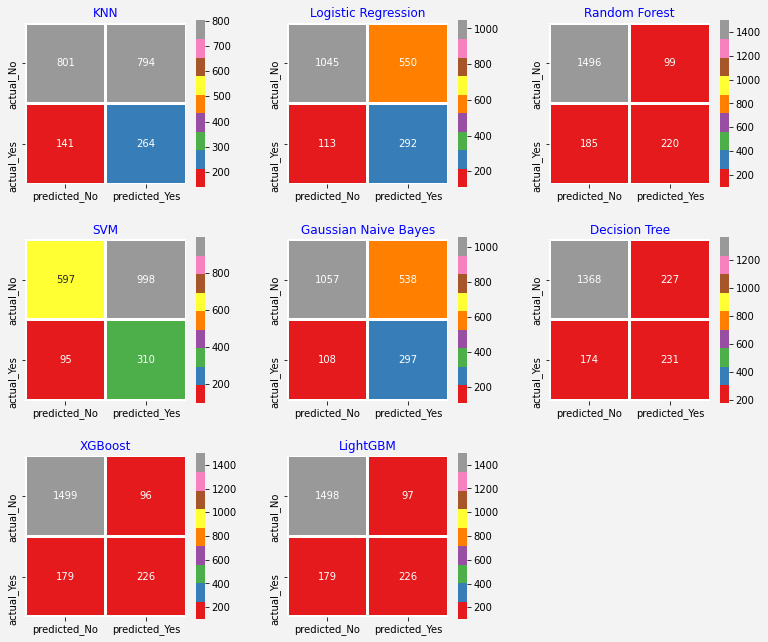

In [ ]:
import itertools

evaluation_lst = [knn, lr, rf,svc, gnb, dt, xgb, lgbm_c]

evaluation_length = len(evaluation_lst)

evaluation_label = ['KNN', 'Logistic Regression','Random Forest','SVM','Gaussian Naive Bayes','Decision Tree','XGBoost','LightGBM']

eva_fig = plt.figure(figsize=(13,15))
eva_fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(evaluation_lst,range(evaluation_length),evaluation_label):
    plt.subplot(4,3,j+1)
    eva_predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(y_test,eva_predictions)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=['predicted_No', 'predicted_Yes'],
                yticklabels=['actual_No','actual_Yes'],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)


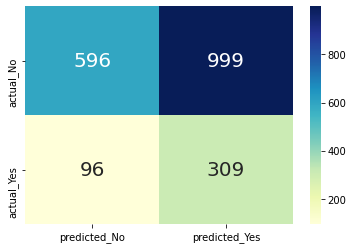

In [ ]:
#display confusion matrix (ANN)
ann_cm = confusion_matrix(y_test,pred_ann)
sns.heatmap(ann_cm,xticklabels=['predicted_No', 'predicted_Yes'], yticklabels=['actual_No','actual_Yes'],
           annot=True, fmt='d', annot_kws={'fontsize':20},cmap="YlGnBu");
true_neg, false_pos = ann_cm[0]
true_pos, false_neg = ann_cm[1]

## **F. Deployment**##

###Model Performance Metrics###

As a result, XGBoost classifier was chosen as a best model among these model listed. This is because xgboost classifier has the highest accuracy, precision and f1 scores among the models. However, the most important evaluation element to decide which is the best model is precision.

After that, we will build the XGBoost classifier model by using Flask which is an application enable us to create a basic server application to host the XGBoost classifier model (Vonage Developer Blog, 2020). At first, we need to load the XGBoost classifier model when the server starts and create an Application Programming Interface (API) endpoint called predict(). This endpoint will get the input variables and transform the categorical data into numeric data in order to make customer churn prediction. Then, this endpoint will generate the customers' data, invoke the model used and return the churn prediction. As a result, we can do churn prediction by getting new inputs to the endpoint.



In [ ]:
#gives model report in dataframe
def model_report(testing_y,pred,name) :
    accuracy     = accuracy_score(testing_y,pred)
    recallscore  = recall_score(testing_y,pred)
    precision    = precision_score(testing_y,pred)
    f1score      = f1_score(testing_y,pred) 
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                      })
    return df

#outputs for every model
model_knn = model_report(y_test,pred_knn,"KNN")
model_lr = model_report(y_test,pred_lr,"Logistic Regression")
model_rf = model_report(y_test,pred_rf,"Random Forest")
model_svc = model_report(y_test,pred_svc,"SVM")
model_gnb = model_report(y_test,pred_gnb,"Gaussian Naive Bayes")
model_dt = model_report(y_test,pred_dt,"Decision Tree")
model_xgb = model_report(y_test,pred_xgb,"XGBoost Classifier")
model_lgbm = model_report(y_test,pred_lgbm_c,"LightGBM Classifier")
model_ann = model_report(y_test,pred_ann,"ANN")

model_performances = pd.concat([model_knn,model_lr,model_rf,model_svc,model_gnb,model_dt,model_xgb,model_lgbm,model_ann],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)
model_performances

,Model,Accuracy_score,Recall_score,Precision,f1_score
0,KNN,0.5325,0.651852,0.249527,0.360902
1,Logistic Regression,0.6685,0.720988,0.346793,0.468324
2,Random Forest,0.8580,0.543210,0.689655,0.607735
3,SVM,0.4535,0.765432,0.237003,0.361938
4,Gaussian Naive Bayes,0.6770,0.733333,0.355689,0.479032
5,Decision Tree,0.7995,0.570370,0.504367,0.535342
6,XGBoost Classifier,0.8625,0.558025,0.701863,0.621733
7,LightGBM Classifier,0.8620,0.558025,0.699690,0.620879
8,ANN,0.4525,0.762963,0.236239,0.360771


In [ ]:
#Grid Search for the best model which is XGBoost classifier
from sklearn.model_selection import GridSearchCV
clf = XGBClassifier(C=5,probability = True)
grid_values = parameters = {'learning_rate':[0.01, 0.05, 0.1, 0.5, 1], 
          'min_samples_split':[2,5,10,100], 
          'max_depth':[2,3,5,50]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.8645
Precision Score : 0.709375
Recall Score : 0.5604938271604938
F1 Score : 0.6262068965517241


array([[1502,   93],
       [ 178,  227]])

## **G. Conclusion**##

###Advantages and Disadvantages of Algorithms Used###

###1)KNN###
####Advantages####
*  KNN can deal with complex and arbitrary decision boundaries and it can be implemented easily.
*  Although KNN is simple but the classification accuracy of KNN is strong and it can generate the results which are accurate in many cases.

####Disadvantages####
*  KNN is slow at classification time.
*  KNN is easy to implement but it is difficult to decide the value of k neighbourhood as the k nearest neighbors must be meaningful in order to classify the unseen object.

###2)Logistic Regression###
####Advantages####

*   Logistic regression is easy to implement and can be interprated easily.
*   Logistic regression is fast at classification time and very efficient to train.

####Disadvantages####
*   Logistic regression is not able to handle a large number of features as it might cause overfitting.
*   Logistic is not able to solve the non-linear problem as it can only perform well when the dataset is linearly separable. So, the non-linear features need to be transformed before implementing logistic regression.



###3)Random Forest###
####Advantages####
*   Random forests is able to handle missing values and outliers. It can handle the missing values by using the median values to replace the continuous variables.
*   Random forest has a high accuracy and it does not has overfitting problem because it takes the average of all the predictions which will cancel out the biases.

####Disadvantages####
*   Random forest is slow at classification time because it has multiple decision tress.
*   The output of random forest is difficult to be interpreted when compared to decision tree because random forest creates a lot of trees.

###4)SVM (Support-Vector Machine)###
####Advantages####

*   Memory efficient

*   It is more effective in high dimensional spaces and when number of dimensions is greater than numbers of samples


####Disadvantages####

*   Not suitable for large datasets because need long time to process it.
*   When dataset has more noise it cannot perform well


###5)Gaussian Naive Bayes###
####Advantages####

*   Gaussian Naive Bayes is easy to build.
*   Gaussian Naive Bayes requires small amount of training data to test data so training period is shorter.
*   If the assumption of independent predictors is true, it will performs better than other models.

####Disadvantages####

*   The main imitation of Naive Bayes is the assumption of independent predictors. Naive Bayes implicitly assumes that all attributes are independent of each other. In real life, it is almost impossible for us to obtain a set of completely independent predictors.

*   If the categorical variable has a category in the test data set, and that category is not observed in the training data set, the model will be assigned a probability of 0 (zero) and it will not be able to make predictions. This is commonly referred to as zero frequency. To solve this problem, we can use smoothing techniques.Laplace estimation is one of the simplest smoothing technique


###6)Decision Tree###
####Advantages####
*   Easy to understand
*   Less training period campared to Random Forest.
*   Can handle categorical and continuous variables

####Disadvantages####

*   Overfitting problem when have noisy data in dataset.

*   Not suitable for large datasets. Because the single tree may become more complex.

*   Unstable because little of noise can make it generate wrong predictions.

###7)XGB Classifier###
####Advantages####
*   As an ensemble model, boosting comes with an easy to read and interpret algorithms, making its prediction interpretations easy to handle.
*   The prediction capability is efficient through the use of its clone methods. Boosting is a resilient method that curbs over-fitting easily.

####Disadvantages####
*   Boosting is sensitive to outliers since every classifier is obliged to fix the errors in the predecessors. Thus, the method is too dependent on outliers.
*   The method is almost impossible to scale up. This is because every estimator bases its correctness on the previous predictors, thus making the procedure difficult to streamline.

###8)LightGBM Classifier###
####Advantages####
*   LightGBM is faster training speed and higher efficiency. This is because lightGBM use histogram based algorithm, example it buckets continuous feature values into discrete bins which fasten the training procedure.
*   It replaces continuous values to discrete bins which result in lower memory usage.
*   LightGBM produces much more complex trees by following leaf wise split approach rather than a level-wise approach which is the main factor in achieving higher accuracy.
*   It is also capable of performing equally good woth large datasets with a significant reduction in training time as compared to XGBoost.

####Disadvantages####
*   LightGBM sometimes lead to overfitting but it can be avoided by setting the max_depth parameter.

###9)Artificial Neural Networks (ANN)###
####Advantages####
*   ANN is having fault tolerance. Corruption of one or more cells of ANN does not prevent it from generating output. This feature makes the networks fault tolerant.
*   ANN habe parallel processing capability. Artificial neural networks (ANN) have numerical strength that can perform more than one job at the same time.

####Disadvantages####
*   ANN is difficulty of showing the problem to the network. ANNs can work with numerical information. Problems have to be translated into numerical values before being introduced to ANN. The display mechanism to be determined here will directly influence the performance of the network. This depends on the user's ability.
*   The duration of the network is unknown. The network is reduced to a certain value of the error on the sample means that the training has been completed. This value does not give us optimum results.

###Result###

As a result, the XGBoost algorithm has the highest accuracy which is 0.8645.  Random Forest and LightGBM Classifier also have a high accuracy of 0.8580 and 0.8620 respectively compared to other models. These three algorithms also have similar scores for recall, precision and f1. But XGBoost is a little higher for all of the score, recall score : 0.560493, precision score : 0.709375, f1 score : 0.626206 so it's the reason it was chosen in implementation. 

###Overfitting Test###
In order to check if the model is overfitting or not, KFold Cross Validation(CV) is used to solve this problem by dividing the data into folds and ensuring that each fold is used as a testing set at some point. It found out when using XGBoost Classifier the accuracy is 86.280 % considered as high accuracy and standard deviation is 0.552%. As a conclusion, model XGBoost used is not overfitting.
 
###Limitation###
 
The dataset used is considered less, so the accuracy may be affected if the dataset is large. Next, there are still many algorithms available but only 9 of them are chosen to be tested so maybe still have other algorithms that are better than XGBoost.


In [ ]:
from sklearn import model_selection

#X = bank.drop("Exited", axis=1)
#y = bank['Exited']

modelChosen = XGBClassifier()
kfold = model_selection.KFold(n_splits=5,random_state=1,shuffle = True)
result = model_selection.cross_val_score(modelChosen, X, y, cv=kfold)

print("Accuracy : %.3f%% " % (result.mean()*100.0))
print("Standard Deviation : %.3f%% " % (result.std()*100.0))


Accuracy : 86.280% 
Standard Deviation : 0.552% 


## **H. References**##

kaggle.com. (n.d.). Bank Customer Churn Prediction. [online] Available at: https://www.kaggle.com/kmalit/bank-customer-churn-prediction.

Moffitt, C. (2017). Guide to Encoding Categorical Values in Python - Practical Business Python. [online] Pbpython.com. Available at: https://pbpython.com/categorical-encoding.html.

Wikipedia Contributors (2019). k-nearest neighbors algorithm. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm.

Wikipedia. (2020). Logistic regression. [online] Available at: https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical [Accessed 10 Sep. 2020].

Avinash Navlani (2019). Understanding Logistic Regression in Python. [online] Available at: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377086&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1029496&gclid=EAIaIQobChMI_6vI94vS6wIVyw0rCh2bwAO-EAAYASAAEgL1wfD_BwE [Accessed 9 Sep. 2020].

(2018). Understanding Random Forests Classifiers in Python. [online] Available at: https://www.datacamp.com/community/tutorials/random-forests-classifier-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377086&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1029496&gclid=EAIaIQobChMIwa-Km5LS6wIVWDUrCh0-Mg5pEAAYASAAEgIxyvD_BwE [Accessed 9 Sep. 2020].

DataFlair. (2018). Train and Test Set in Python Machine Learning - How to Split. [online] Available at: https://data-flair.training/blogs/train-test-set-in-python-ml/#:~:text=Temp%20is%20a%20label%20to,Then%2C%20we%20split%20the%20data.&text=The%20line%20test_size%3D0.2%20suggests,rest%20should%20be%20train%20data. [Accessed 10 Sep. 2020].

kaggle.com. (n.d.). SMOTE with Imbalance Data. [online] Available at: https://www.kaggle.com/qianchao/smote-with-imbalance-data [Accessed 10 Sep. 2020].

Corporate Finance Institute. (n.d.). Boosting - Overview, Forms, Pros and Cons, Option Trees. [online] Available at: https://corporatefinanceinstitute.com/resources/knowledge/other/boosting [Accessed 10 Sep. 2020].

a. (n.d.). what are the Pros and cons of LGB model? | Data Science and Machine Learning. [online] Available at: https://www.kaggle.com/questions-and-answers/103834 [Accessed 10 Sep. 2020].

www.linkedin.com. (n.d.). Artificial Neural Networks Advantages and Disadvantages. [online] Available at: https://www.linkedin.com/pulse/artificial-neural-networks-advantages-disadvantages-maad-m-mijwel#:~:text=Advantages%20of%20Artificial%20Neural%20Networks%20(%20ANN)&text=The%20loss%20of%20performance%20here [Accessed 10 Sep. 2020].

GitHub. (n.d.). AaronWard/Churn-Modelling-Artificial-Neural-Network. [online] Available at: https://github.com/AaronWard/Churn-Modelling-Artificial-Neural-Network/blob/master/ann.py [Accessed 10 Sep. 2020].

Exsilio Blog. (2016). Accuracy, Precision, Recall & F1 Score: Interpretation of Performance Measures. [online] Available at: https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures [Accessed 10 Sep. 2020].

Dhiraj Kumar (2019). Top 4 advantages and disadvantages of Support Vector Machine or SVM. [online] Medium. Available at: https://medium.com/@dhiraj8899/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107.

Raheel Shaikh (2018). Cross Validation Explained: Evaluating estimator performance. [online] Medium. Available at: https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85.

Kumar, N. (2019). The Professionals Point: Advantages and Disadvantages of Naive Bayes in Machine Learning. [online] The Professionals Point. Available at: http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of-naive.html [Accessed 10 Sep. 2020].

Vonage Developer Blog. (2020). Building a User Churn Prediction Model with Scikit-Learn and Vonage. [online] Available at: https://www.nexmo.com/blog/2020/04/27/building-a-user-churn-prediction-model-with-scikit-learn-and-vonage-dr [Accessed 11 Sep. 2020].


